In [1]:
!cp ../datacube.conf . # import the datacube conf file

In [2]:
# Enable plotting
%matplotlib inline

# Supress Warning 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import time

# Visualize Area of Interest (AOI) with map underlays



In [3]:
import datacube
dc = datacube.Datacube(app = 'my_app', config = './datacube.conf')

Failed to resolve driver datacube.plugins.index::s3aio_index


In [4]:
list_of_products = dc.list_products()
geoTiff_products = list_of_products[list_of_products['format'] == 'GeoTiff']
geoTiff_products

,name,description,lon,instrument,platform,format,time,product_type,lat,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,
24,landsat_5_USARD,Landsat 5 US/ARD Product Definition,None,TM,LANDSAT_5,GeoTiff,None,USARD,None,NaN,NaN,NaN,NaN
25,landsat_7_USARD,Landsat 7 US/ARD Product Definition,None,ETM,LANDSAT_7,GeoTiff,None,USARD,None,NaN,NaN,NaN,NaN
26,landsat_8_USARD,Landsat 8 US/ARD Product Definition,None,OLI_TIRS,LANDSAT_8,GeoTiff,None,USARD,None,NaN,NaN,NaN,NaN


# select  a scene to determine the bounding box from a small date range

In [5]:

import datacube
import time

from datetime import datetime

dc = datacube.Datacube()

selected_product = 'landsat_8_USARD'

date_range = (
        datetime(2015,6,1),
        datetime(2015,7,31))
dss = dc.find_datasets(product=selected_product, time=date_range, measurements=['red',])

clear_datasets = []
for item in dss:
    
    if float(item.metadata_doc['cloud_cover']) < 20.0:
        if float(item.metadata_doc['fill']) < 30.0:
            clear_datasets.append(item)
            
print("Number of Pretty Scenes", len(clear_datasets))
for citem in clear_datasets:
    print(citem.uris)


Number of Pretty Scenes 3
['s3://ga-odc-eros-ard-west/usard/LC08/20150709/LC08_CU_003003_20150709_20170713_C01_V01.xml']
['s3://ga-odc-eros-ard-west/usard/LC08/20150623/LC08_CU_003003_20150623_20170713_C01_V01.xml']
['s3://ga-odc-eros-ard-west/usard/LC08/20150607/LC08_CU_003003_20150607_20170713_C01_V01.xml']


In [6]:
print(citem.uris)


# dir(citem)

['s3://ga-odc-eros-ard-west/usard/LC08/20150607/LC08_CU_003003_20150607_20170713_C01_V01.xml']


In [7]:
citem.measurements

{'blue': {'layer': 1,
  'path': 's3://ga-odc-eros-ard-west/usard/LC08/20150607/LC08_CU_003003_20150607_20170713_C01_V01_SRB2.tif'},
 'coastal_aerosol': {'layer': 1,
  'path': 's3://ga-odc-eros-ard-west/usard/LC08/20150607/LC08_CU_003003_20150607_20170713_C01_V01_SRB1.tif'},
 'green': {'layer': 1,
  'path': 's3://ga-odc-eros-ard-west/usard/LC08/20150607/LC08_CU_003003_20150607_20170713_C01_V01_SRB3.tif'},
 'nir': {'layer': 1,
  'path': 's3://ga-odc-eros-ard-west/usard/LC08/20150607/LC08_CU_003003_20150607_20170713_C01_V01_SRB5.tif'},
 'pixel_qa': {'layer': 1,
  'path': 's3://ga-odc-eros-ard-west/usard/LC08/20150607/LC08_CU_003003_20150607_20170713_C01_V01_PIXELQA.tif'},
 'red': {'layer': 1,
  'path': 's3://ga-odc-eros-ard-west/usard/LC08/20150607/LC08_CU_003003_20150607_20170713_C01_V01_SRB4.tif'},
 'swir1': {'layer': 1,
  'path': 's3://ga-odc-eros-ard-west/usard/LC08/20150607/LC08_CU_003003_20150607_20170713_C01_V01_SRB6.tif'},
 'swir2': {'layer': 1,
  'path': 's3://ga-odc-eros-ard-wes

In [8]:
citem.extent

Geometry(POLYGON ((-2115585 2714805,-2115585 2864805,-1965585 2864805,-1965585 2714805,-2115585 2714805)), epsg:5072)

citem.time

In [9]:
citem.time

Range(begin=datetime.datetime(2015, 6, 7, 18, 55, 15, 831248, tzinfo=tzutc()), end=datetime.datetime(2015, 6, 7, 18, 55, 15, 831248, tzinfo=tzutc()))

In [10]:
citem.bounds

BoundingBox(left=-2115585.0, bottom=2714805.0, right=-1965585.0, top=2864805.0)

In [11]:
# import json
json_in = citem.metadata_doc

type (json_in)

json_in['cloud_cover']
json_in
#json_in['creation_dt']



longitude_extents = ((float)(json_in['extent']['coord']['ll']['lon']), (float)(json_in['extent']['coord']['ur']['lon']))

print("longitude_extents",longitude_extents)

latitude_extents = ((float)(json_in['extent']['coord']['ll']['lat']), (float)(json_in['extent']['coord']['ur']['lat']))

print("latitude_extents",latitude_extents)

# meta = json.loads(json_in)

# meta


longitude_extents (-123.652959903, -121.279418402)
latitude_extents (44.6880805402, 46.35679328)


>### Pick a product  
>Use the platform names from the previous block to select a small Data Cube. The data_access_api utility will give you lat, lon, and time bounds of your Data Cube.   

In [12]:
# import utils.data_cube_utilities.data_access_api as dc_api  
# api = dc_api.DataAccessApi(config = './datacube.conf')

platform = "LANDSAT_8"

product = "Landsat_8_USARD"

# Get Coordinates
# coordinates = api.get_full_dataset_extent(platform = platform, product = product)

In [13]:
# help

> #### Display Lat-Lon and Time Bounds

# Visualize Data Cube Region
## USARD h03v03 TILE!
### This picture shows the entire 5000 x 5000 px tile (150km x 150 km)

In [14]:
## The code below renders a map that can be used to orient yourself with the region.
from noteLib import display_map

## Need to learn more about folium - looks really cool.

grid_tup = (0.15, 0.15)  ## NOTE this did not work no white grid lines - DEBUG Later


#display_map(latitude = latitude_extents, longitude = longitude_extents)
display_map(latitude = latitude_extents, longitude = longitude_extents, resolution = grid_tup)

> #### Picking a smaller analysis region
# hayden Island Only - approximately 300x300 pixels

In [15]:


#### Hayden Island
latitude_extents =  (45.59,45.65)
longitude_extents = (-122.65,-122.75)


tcoord = {
    'Latitude': 45.5936,
    'Longitude': -122.8502
}

lat = tcoord['Latitude']
lon = tcoord['Longitude']

### Below is supposed to be a dry area = bombs
# latitude_extents = (lat, lat +.03)
# longitude_extents = (lon, lon +.03)



In [16]:
display_map(latitude = latitude_extents, longitude = longitude_extents)

> ### Loading the Data
> The following snippet loads in Landsat Imagery for the extents we've just defined. Furthermore we specify a preference to load data from `red`, `green`, `blue`, `nir`, `swir1`, `swir2`, and `pixel_qa` bands.  

In [17]:
def load_me():
    selected_product = 'landsat_8_USARD'
    measurements=['red','green','blue']
    # ## for pyccd - you need thesed 
    # measurements = ['red', 'green', 'blue', 'nir', 'swir1', 'swir2', 'pixel_qa']

    ds2 = dc.load(product=selected_product, datasets=clear_datasets, measurements=measurements,
              longitude = longitude_extents, latitude = latitude_extents,
              output_crs = 'epsg:5072', 
              # output_crs = 'epsg:4326', 

              resolution = (-30,30))
    return (ds2)

In [18]:
t1 = time.time()
%time landsat_dataset = load_me()

Failed to resolve driver datacube.plugins.io.read::s3aio
Failed to resolve driver datacube.plugins.io.read::s3aio_test
Exception during driver init, driver name: datacube.plugins.io.read::failing_end_point_throw
Failed to resolve driver datacube.plugins.io.read::bad_end_point
Driver init returned None, driver name: datacube.plugins.io.read::failing_end_point_none


TONY load output_crs=output_crs, =  epsg:5072
TONY output_geobox crs =  epsg:5072
TONY geopolygon crs =  epsg:5072
TONY geopolygon stuff =  epsg:5072 | 30.00, 0.00,-2060460.00|
| 0.00,-30.00, 2809680.00|
| 0.00, 0.00, 1.00| 312 287
TONY GeoBox extent =  Geometry({'type': 'Polygon', 'coordinates': [[(-2060460.0, 2809680.0), (-2060460.0, 2801070.0), (-2051100.0, 2801070.0), (-2051100.0, 2809680.0), (-2060460.0, 2809680.0)]]}, CRS('epsg:5072'))
TONY load type geobox =  <class 'datacube.utils.geometry.GeoBox'>
TONY load geobox =  GeoBox(Geometry({'type': 'Polygon', 'coordinates': [[(-122.77303197967335, 45.645602912183584), (-122.74237325247223, 45.57116377215325), (-122.62716335861508, 45.59450686115302), (-122.6577041866477, 45.66897661134222), (-122.77303197967335, 45.645602912183584)]]}, CRS('EPSG:4326')))
TONY load geobox.extent =  Geometry({'type': 'Polygon', 'coordinates': [[(-2060460.0, 2809680.0), (-2060460.0, 2801070.0), (-2051100.0, 2801070.0), (-2051100.0, 2809680.0), (-2060460

TONY storage RasterDatasetDataSource src  <open DatasetReader name='s3://ga-odc-eros-ard-west/usard/LC08/20150607/LC08_CU_003003_20150607_20170713_C01_V01_SRB4.tif' mode='r'>
TONY BandDataSource reproject  epsg:5072
TONY BandDataSource reproject abc <class 'NoneType'>
TONY BandDataSource reproject dir abc ['__bool__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']
TONY BandDataSource reproject print abc None
TONY (driver/readers.py) source_type <class 'datacube.storage.storage.RasterDatasetDataSource'>
TONY (driver/readers.py) band_name red
TONY (driver/readers.py) return source_type <datacube.storage.storage.RasterDatasetDataSource object at 0x7f0ecf57f7b8>
TONY storage RasterDatasetDataSource src  <open DatasetReader name='s3://ga-odc-eros-ard-west/usar

TONY BandDataSource reproject abc <class 'NoneType'>
TONY BandDataSource reproject dir abc ['__bool__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']
TONY BandDataSource reproject print abc None
2TONY api-core/create_storage - xarray is  <class 'xarray.core.dataset.Dataset'>
2TONY api-core/create_storage - xarray is  <bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:  (time: 3, x: 312, y: 287)
Coordinates:
  * time     (time) datetime64[ns] 2015-06-07T18:55:15.831248 ...
  * y        (y) float64 2.81e+06 2.81e+06 2.81e+06 2.81e+06 2.81e+06 ...
  * x        (x) float64 -2.06e+06 -2.06e+06 -2.06e+06 -2.06e+06 -2.06e+06 ...
Data variables:
    red      (time, y, x) int16 125 113 116 122 114 53 54 106 1

In [19]:
landsat_dataset

<xarray.Dataset>
Dimensions:  (time: 3, x: 312, y: 287)
Coordinates:
  * time     (time) datetime64[ns] 2015-06-07T18:55:15.831248 ...
  * y        (y) float64 2.81e+06 2.81e+06 2.81e+06 2.81e+06 2.81e+06 ...
  * x        (x) float64 -2.06e+06 -2.06e+06 -2.06e+06 -2.06e+06 -2.06e+06 ...
Data variables:
    red      (time, y, x) int16 125 113 116 122 114 53 54 106 103 109 116 ...
    green    (time, y, x) int16 232 222 221 236 221 164 162 213 211 211 215 ...
    blue     (time, y, x) int16 149 140 149 143 133 62 57 110 108 112 120 ...
Attributes:
    crs:      epsg:5072

In [20]:
t2 = time.time()
elapsed = t2 - t1
print("Load took", elapsed, "seconds.")

Load took 11.578073740005493 seconds.


In [21]:
!date

Mon Oct  8 10:07:06 CDT 2018


### Examining the size of our extent.  

In [22]:
landsat_dataset
#view the dimensions and sample content from the cube
# time and x and y in a simple cartesian coordinate system
# origin is upper left - ul = 0,0 in the xarray - x=0, y=0

<xarray.Dataset>
Dimensions:  (time: 3, x: 312, y: 287)
Coordinates:
  * time     (time) datetime64[ns] 2015-06-07T18:55:15.831248 ...
  * y        (y) float64 2.81e+06 2.81e+06 2.81e+06 2.81e+06 2.81e+06 ...
  * x        (x) float64 -2.06e+06 -2.06e+06 -2.06e+06 -2.06e+06 -2.06e+06 ...
Data variables:
    red      (time, y, x) int16 125 113 116 122 114 53 54 106 103 109 116 ...
    green    (time, y, x) int16 232 222 221 236 221 164 162 213 211 211 215 ...
    blue     (time, y, x) int16 149 140 149 143 133 62 57 110 108 112 120 ...
Attributes:
    crs:      epsg:5072

In [23]:
landsat_dataset.dims
# just get the dimensions using the .dims method from xarray

Frozen(SortedKeysDict({'y': 287, 'x': 312, 'time': 3}))

# Now graph/plot/display/visualize the raster observations
## RGB Plots

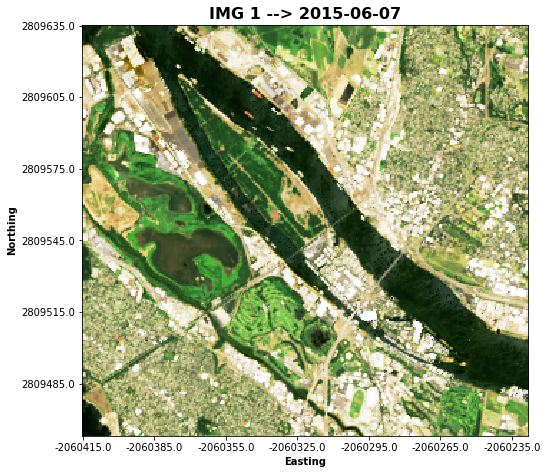

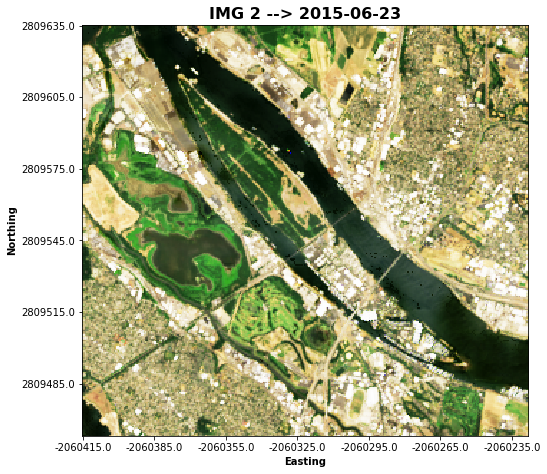

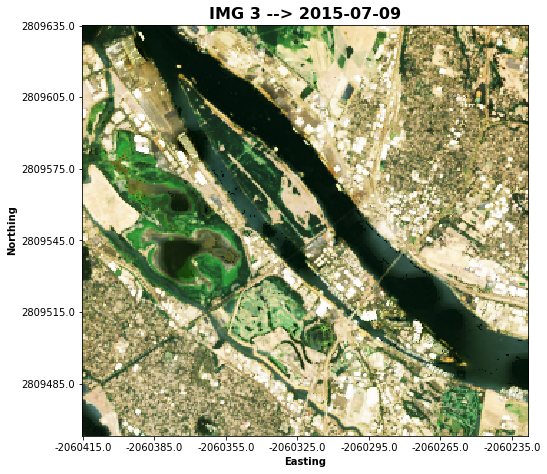

In [24]:
from noteLib import plot_labeled_rgb
ntime = len(landsat_dataset.time)

cnt = 0
for t in range (ntime):
    # print("Hi",cnt)
    cnt = cnt + 1
    plot_labeled_rgb(landsat_dataset, t, cnt)

